In [384]:
# general purpose modules for handling data
import numpy as np
from numpy import array
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

# for loading telo data column containing individual
# telomere length values
from ast import literal_eval

# data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# plot type I really like
from ptitprince import PtitPrince as pt

# custom module for handling telomere length data
import telomere_methods_astros as telo_ma

# statistics
import scipy.stats as stats
import scikit_posthocs as sp

In [385]:
# setting all graphs to have darkgrid style w/ black edges for axes elements

sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

## Analyzing Mean Telomere Lengths
---

### Reading in the data

In [386]:
astro_df = pd.read_csv('../excel data/All_astronauts_telomere_length_dataframe.csv')
astro_df['telo data'] = astro_df['telo data'].apply(lambda row: np.array(literal_eval(row)))
astro_df['astro id'] = astro_df['astro id'].astype('str')

In [387]:
astro_df.head(4)

astro number astro id timepoint flight status  \
0             1     5163     L-270    Pre-Flight   
1             1     5163     L-180    Pre-Flight   
2             1     5163      L-60    Pre-Flight   
3             1     5163      FD90    Mid-Flight   

                                           telo data  telo means  \
0  [46.9762779819579, 78.38289341797528, 105.1119...   87.672120   
1  [102.38890745071835, 107.3170731707317, 61.944...  101.077756   
2  [92.4323421316405, 144.537253591714, 135.59973...  128.599235   
3  [89.22485800200468, 116.6388239224858, 116.221...  101.183129   

                    Q1                           Q2-3                   Q4  
0  telos preF Q1 <0.25  telos preF Q2-3 >0.25 & <0.75  telos preF Q4 >0.75  
1  telos preF Q1 <0.25  telos preF Q2-3 >0.25 & <0.75  telos preF Q4 >0.75  
2  telos preF Q1 <0.25  telos preF Q2-3 >0.25 & <0.75  telos preF Q4 >0.75  
3  telos preF Q1 <0.25  telos preF Q2-3 >0.25 & <0.75  telos preF Q4 >0.75

### Graphing / Stats Mean Telomere Lengths for 11 Astros

First.. let's see how mean telomere length changes w/ respect to spaceflight when all 11 astronauts are averaged together for pre-, mid-, & post-flight timepoints

Text(0, 0.5, 'Mean Telomere Length')

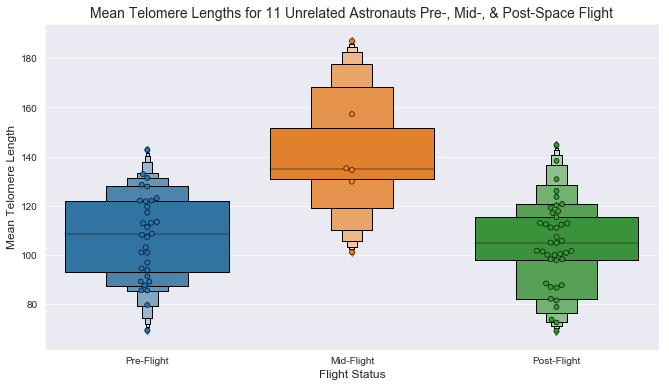

In [5]:
fig = plt.figure(figsize=(11,6))
ax = sns.boxenplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], data=astro_df)
ax = sns.swarmplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], data=astro_df,
                  linewidth=.6, edgecolor="black", dodge=True)

ax.set_title('Mean Telomere Lengths for 11 Unrelated Astronauts Pre-, Mid-, & Post-Space Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=12)
ax.set_ylabel('Mean Telomere Length', fontsize=12)

In [6]:
# one-way anova between mean telomere lengths per timepoint
pre_flight = astro_df[astro_df['flight status'] == 'Pre-Flight']['telo means']
mid_flight = astro_df[astro_df['flight status'] == 'Mid-Flight']['telo means']
post_flight = astro_df[astro_df['flight status'] == 'Post-Flight']['telo means']
                      
print(stats.f_oneway(pre_flight, mid_flight, post_flight))
sp.posthoc_ttest(astro_df, val_col='telo means', group_col='flight status', p_adjust='holm')

# I need to grab cell means for statistical tests; would be better for graphing as well?

F_onewayResult(statistic=10.31663691107309, pvalue=0.00010866812307219371)


Pre-Flight  Mid-Flight  Post-Flight
Pre-Flight    -1.000000    0.000915     0.483015
Mid-Flight     0.000915   -1.000000     0.000202
Post-Flight    0.483015    0.000202    -1.000000

Mean telomere length increases as a function of spaceflight. Furthermore, mean telomere length for astronauts overall appears to be slightly shorter after spaceflight.. Let's see what telomere length looks like for just our astronauts w/ inflight data

### Graphing / Stats Mean Telomere lengths 3 Inflight Astros

In [7]:
only_mid_astros_df = astro_df[(astro_df['astro id'] == '5163') |
                              (astro_df['astro id'] == '1536') |
                              (astro_df['astro id'] == '2171')].copy()
only_mid_astros_df.shape

(24, 9)

Text(0.5, 1.0, 'Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight')

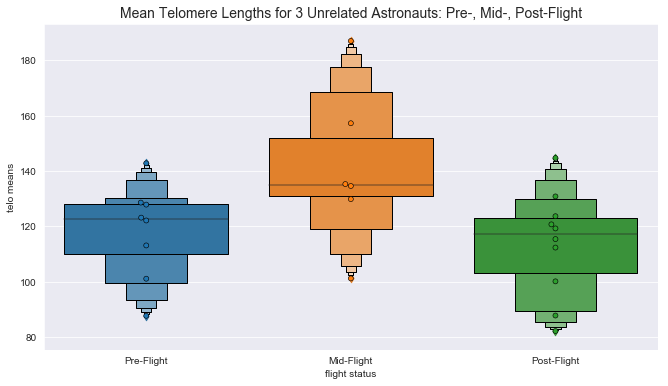

In [8]:
fig = plt.figure(figsize=(11,6))
ax = sns.boxenplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], data=only_mid_astros_df)
ax = sns.swarmplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], data=only_mid_astros_df,
                  linewidth=0.6, edgecolor='black')

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight', fontsize=14)

In [9]:
# one-way anova between mean telomere lengths per timepoint

om_pre_flight = only_mid_astros_df[only_mid_astros_df['flight status'] == 'Pre-Flight']['telo means']
om_mid_flight = only_mid_astros_df[only_mid_astros_df['flight status'] == 'Mid-Flight']['telo means']
om_post_flight = only_mid_astros_df[only_mid_astros_df['flight status'] == 'Post-Flight']['telo means']
                      
# print(stats.f_oneway(om_pre_flight, om_mid_flight, om_post_flight))
# sp.posthoc_ttest(only_mid_astros_df, val_col='telo means', group_col='flight status', p_adjust='holm')

These 3 astronauts are our only individuals w/ inflight data, so the mid-flight mean telomere length has remained the same. The pre-/post-flight data has the same relationship compared to the data for all 11 astronauts: post-flight mean telomere length is *slightly* shorter.

Now.. our inflight astronauts had blood samples collected at different flight days. Let's first parse out the mean telomere length data per astronaut.

### Parsing Telomere Length @ Mid-Flight Dates for 3 Inflight Astros

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight')

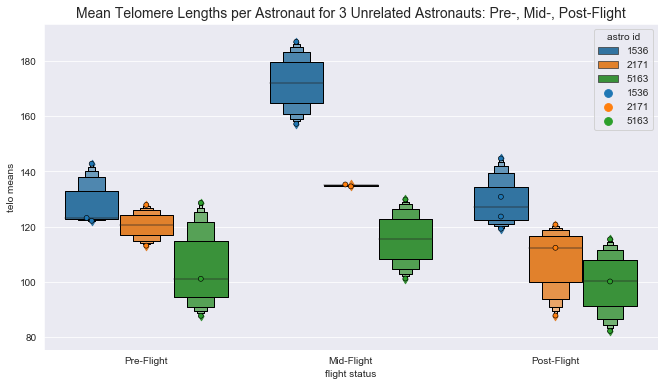

In [10]:
fig = plt.figure(figsize=(11,6))
ax = sns.boxenplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], hue='astro id', data=only_mid_astros_df, dodge=True)
ax = sns.swarmplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], hue='astro id', data=only_mid_astros_df,
                  linewidth=0.6, edgecolor='black', dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid-, Post-Flight', fontsize=14)

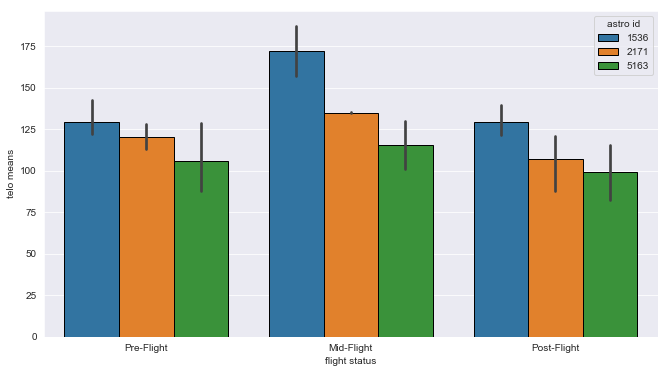

In [11]:
fig = plt.figure(figsize=(11,6))
ax = sns.barplot(x='flight status', y='telo means', order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'], hue='astro id', data=only_mid_astros_df, dodge=True)

Even when considered separately, for each astronaut the average of mean telomere length for their samples taken midflight was always longer than the average of samples pre-flight. As well, the average of mean telomere length for samples post-flight were slightly shorter. Interestingly, dso2171 looks to have similar mean telomere length for both blood draws.

Now we must consider if mean telomere length increases as a function of *duration in spaceflight*. We can do so b.c astros 1536&5163 samples were collected at FD90 & 140, while astro 2171 samples were collected at FD45 & 260. Let's first parse out the two mid-flight timepoints, then examine mid 1 & mid 2 for each astronaut

In [12]:
only_mid_astros_df['flight status mid split'] = only_mid_astros_df.loc[:, 'timepoint'].apply(lambda row: telo_ma.mid_split(row))

Text(0.5, 1.0, 'Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

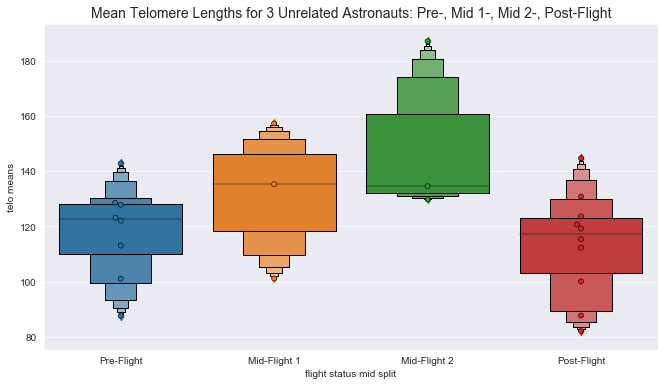

In [13]:
fig = plt.figure(figsize=(11,6))
ax = sns.boxenplot(x='flight status mid split', y='telo means', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], data=only_mid_astros_df)
ax = sns.swarmplot(x='flight status mid split', y='telo means', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], data=only_mid_astros_df,
                  linewidth=0.6, edgecolor='black')

ax.set_title('Mean Telomere Lengths for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight', fontsize=14)

The average of mean telomere lengths for mid-flight 2 is certainly higher than for mid-flight 1. There may be some relationship between telomere lengthening and spaceflight duration. However, telomere length does appear to have a biological upper bounds for species, though numerically undefined, thus it's unlikely that telomere length would increase indefinitely via spaceflight. Let's see how the data looks per astronaut.

Text(0.5, 1.0, 'Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

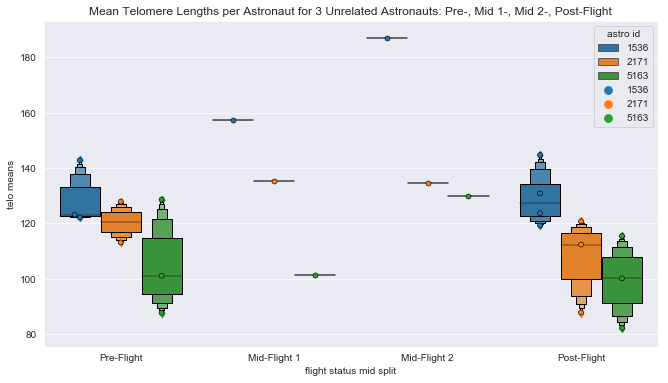

In [14]:
fig = plt.figure(figsize=(11,6))
ax = sns.boxenplot(x='flight status mid split', y='telo means', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                   hue='astro id', data=only_mid_astros_df, dodge=True)
ax = sns.swarmplot(x='flight status mid split', y='telo means', order=['Pre-Flight', 'Mid-Flight 1', 'Mid-Flight 2', 'Post-Flight'], 
                   hue='astro id', data=only_mid_astros_df,
                  linewidth=0.6, edgecolor='black', dodge=True)

ax.set_title('Mean Telomere Lengths per Astronaut for 3 Unrelated Astronauts: Pre-, Mid 1-, Mid 2-, Post-Flight')

Astros 1536 & 5163 blood draws occured at FD90 & FD140, and both experienced an increase in mean telomere length at mid-flight 1 relative to pre-flight, and experienced an additional increase over mid-flight 1 at mid0flight 2.

Astro 2171 had blood draws at FD45 & FD260, and while mid-flight 1 had increased mean telomere length relative to pre-flight, mid-flight 2 was not. Rather, mid-flight 2 was numerically close to mid-flight 1. Altogether, mean telomere length does not appear to increase indefinitely with spaceflight. Our limited # of datapoints suggest that while mean telomere length increases mid-flight, it does not increase indefinitely.

Let's look at individual telomere lengths.

## Analyzing Individual Telomere Length Distributions

### Reading in the data

In [15]:
exploded_telos_astro_df = pd.read_csv('../excel data/exploded_telos_astros_df.csv')
exploded_telos_astro_df['astro id'] = exploded_telos_astro_df['astro id'].astype('str')

exploded_telos_astro_df.head(4)

astro number astro id timepoint flight status  telo means  \
0             1     5163     L-270    Pre-Flight   87.672120   
1             1     5163     L-180    Pre-Flight  101.077756   
2             1     5163      L-60    Pre-Flight  128.599235   
3             1     5163      FD90    Mid-Flight  101.183129   

   telo data exploded  
0           46.976278  
1          102.388907  
2           92.432342  
3           89.224858

### Grabbing Individual Telomere Lengths 3 Inflight Astros

In [16]:
exploded_telos_only_mid_astros_df = exploded_telos_astro_df[(exploded_telos_astro_df['astro id'] == '5163') |
                              (exploded_telos_astro_df['astro id'] == '1536') |
                              (exploded_telos_astro_df['astro id'] == '2171')].copy()

exploded_telos_only_mid_astros_df.shape

(132480, 6)

In [17]:
exploded_telos_only_mid_astros_df['flight status mid split'] = exploded_telos_only_mid_astros_df['timepoint'].apply(lambda row: telo_ma.mid_split(row))

We've seen that mean telomere length increases during spaceflight. Now let us define short&long telomeres and visualize individual telomere length distributions per astronaut for timepoints most distal to spaceflight. 

To define short & long telomeres, we'll first find the earliest pre-flight samples for each astronaut. Then, in the individual telomere length distribution for that sample, we'll find the quartile boundary values for the bottom 25% of telos (short telos), middle 50%, and top 25% (long telos). The short, medium, and long telomeres will be colored yellow, blue, and pink respectively.

Once the quartile boundary values are established by the earliest pre-flight timepoint, the quartile boundary values will be used to color both midflight samples and the latest post-flight sample. In doing so, we can visualize and quantify the shifts of short/mid/long telomeres for each sample relative to the earliest timepoint. Now we have a means to discuss these classes of telomeres.

### Graphing Individual Telo Distributions 3 Inflight Astros

In [488]:
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [489]:
%reload_ext autoreload

In [490]:
exploded_telos_only_mid_astros_df['astro id'] = exploded_telos_only_mid_astros_df['astro id'].astype('str')
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_only_mid_astros_df)

NameError: name 'exploded_telos_only_mid_astros_df' is not defined

Intriguingly, we see a *decrease* in short telos and an *increase* in long telos inflight. Furthermore, 2/3 astronauts experienced a remarkable increase in short telomeres post-flight. Now, let us quantify and visualize the #s of short/medium/long telomeres for the complete timecourse for these 3 unrelated astronauts.

In [21]:
melted_quartiles_astro_df = pd.read_csv('../excel data/melted_quartiles_astro_df.csv')

In [22]:
melted_quartiles_astro_df['astro id'] = melted_quartiles_astro_df['astro id'].astype('str')
melted_quartiles_astro_df.head(4)

astro number astro id timepoint flight status  \
0             1     5163     L-270    Pre-Flight   
1             1     5163     L-180    Pre-Flight   
2             1     5163      L-60    Pre-Flight   
3             1     5163      FD90    Mid-Flight   

                                           telo data  telo means relative Q  \
0  [46.9762779819579, 78.38289341797528, 105.1119...   87.672120         Q1   
1  [102.38890745071835, 107.3170731707317, 61.944...  101.077756         Q1   
2  [92.4323421316405, 144.537253591714, 135.59973...  128.599235         Q1   
3  [89.22485800200468, 116.6388239224858, 116.221...  101.183129         Q1   

   Q freq counts  
0           1384  
1            848  
2            259  
3            472

In [23]:
mid_only_melted_quartiles_astro_df = melted_quartiles_astro_df[(melted_quartiles_astro_df['astro id'] == '5163') |
                              (melted_quartiles_astro_df['astro id'] == '1536') |
                              (melted_quartiles_astro_df['astro id'] == '2171')].copy()

distal_mid_only_melted_quartiles_astro_df = mid_only_melted_quartiles_astro_df
distal_mid_only_melted_quartiles_astro_df = mid_only_melted_quartiles_astro_df[(mid_only_melted_quartiles_astro_df['timepoint'] != 'L-60') &
                                                                               (mid_only_melted_quartiles_astro_df['timepoint'] != 'R+60') &
                                                                               (mid_only_melted_quartiles_astro_df['timepoint'] != 'R+7') & 
                                                                               (mid_only_melted_quartiles_astro_df['timepoint'] != 'R+5')].copy()

distal_mid_only_melted_quartiles_astro_df.head(5)

astro number astro id timepoint flight status  \
0             1     5163     L-270    Pre-Flight   
1             1     5163     L-180    Pre-Flight   
3             1     5163      FD90    Mid-Flight   
4             1     5163     FD140    Mid-Flight   
7             1     5163     R+180   Post-Flight   

                                           telo data  telo means relative Q  \
0  [46.9762779819579, 78.38289341797528, 105.1119...   87.672120         Q1   
1  [102.38890745071835, 107.3170731707317, 61.944...  101.077756         Q1   
3  [89.22485800200468, 116.6388239224858, 116.221...  101.183129         Q1   
4  [161.89442031406617, 152.82325425993986, 223.3...  129.851970         Q1   
7  [163.46475108586702, 157.11660541262947, 75.76...  115.403190         Q1   

   Q freq counts  
0           1384  
1            848  
3            472  
4            203  
7            936

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

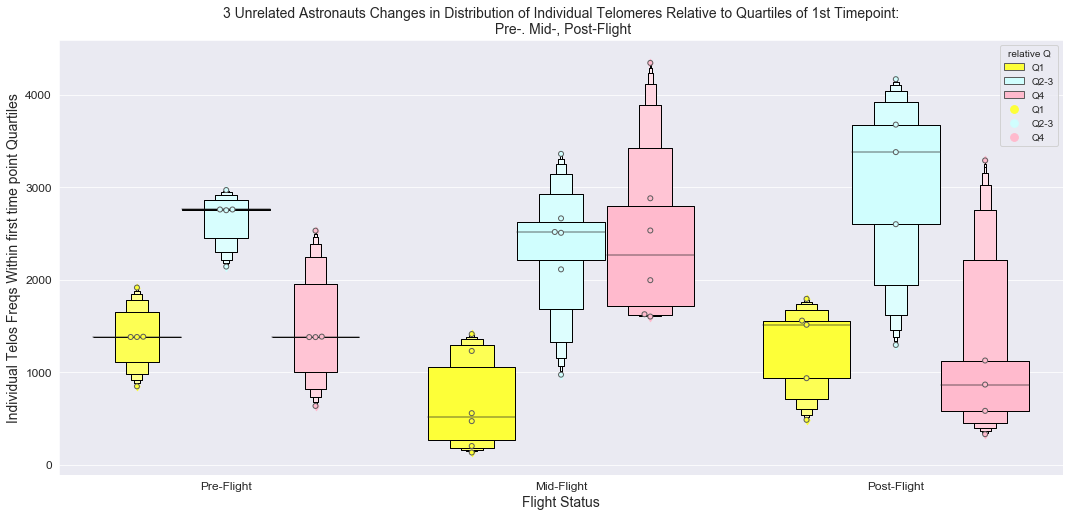

In [ ]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status', y='Q freq counts', hue='relative Q', data=distal_mid_only_melted_quartiles_astro_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status', y='Q freq counts', hue='relative Q', data=distal_mid_only_melted_quartiles_astro_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [ ]:
distal_mid_only_melted_quartiles_astro_df['flight status mid split'] = (distal_mid_only_melted_quartiles_astro_df['timepoint']
                                                                                .apply(lambda row: telo_ma.mid_split(row)))


Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

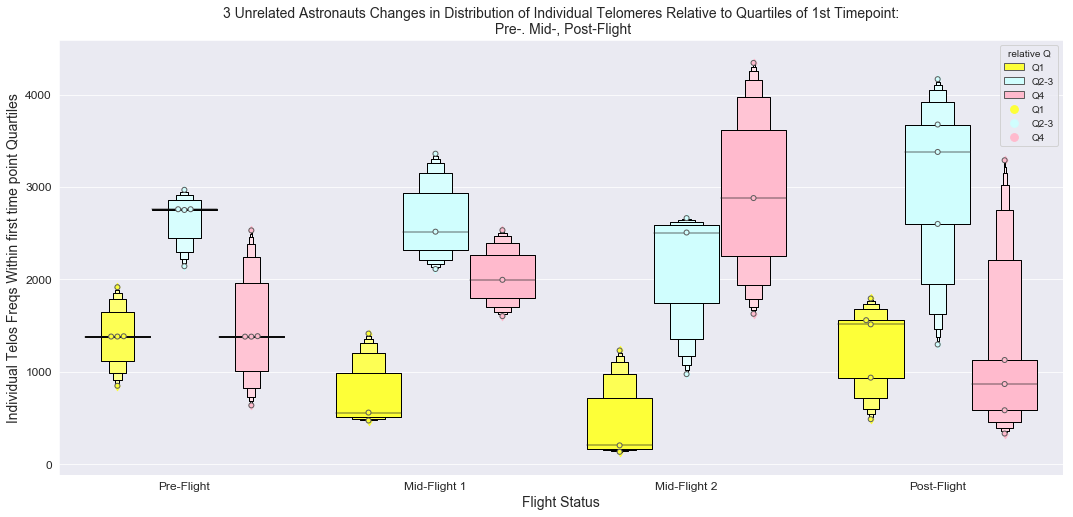

In [ ]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=distal_mid_only_melted_quartiles_astro_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.swarmplot(x='flight status mid split', y='Q freq counts', hue='relative Q', data=distal_mid_only_melted_quartiles_astro_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('3 Unrelated Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [ ]:
# import matplotlib.patheffects as mpe

# sns.set_style(style="darkgrid",rc={'patch.edgecolor': 'black'})
# palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

# sns.catplot(x='flight status', y='Q freq counts', hue='relative Q', col='astro id', col_order=['5163', '1536', '2171'], height=8, aspect=1,
#            data=distal_mid_only_melted_quartiles_astro_df, kind='point', dodge=True,
#             **{'markers': ['D', 'D', 'D'], 'scale': 3,})

In [ ]:
# sns.set_style(style="darkgrid",rc={'patch.edgecolor': 'black'})
# palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

# sns.catplot(x='flight status mid split', y='Q freq counts', hue='relative Q', col='astro id', col_order=['5163', '1536', '2171'], height=8, aspect=1,
#            data=distal_mid_only_melted_quartiles_astro_df, kind='point', dodge=True,
#             **{'markers': ['D', 'D', 'D'], 'scale': 3,})

In [ ]:
distal_melted_quartiles_astro_df = melted_quartiles_astro_df[(melted_quartiles_astro_df['timepoint'] != 'L-60') &
                                                             (melted_quartiles_astro_df['timepoint'] != 'R+5') &
                                                             (melted_quartiles_astro_df['timepoint'] != 'R+7') &
                                                             (melted_quartiles_astro_df['timepoint'] !='R+60')].copy()

Text(0, 0.5, 'Individual Telos Freqs Within first time point Quartiles')

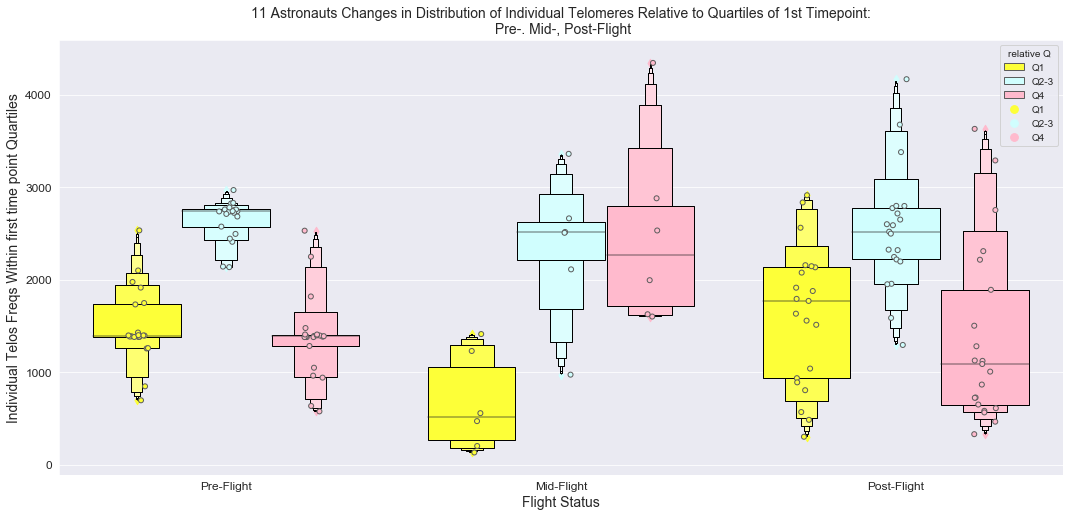

In [ ]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='flight status', y='Q freq counts', hue='relative Q', data=distal_melted_quartiles_astro_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='flight status', y='Q freq counts', hue='relative Q', data=distal_melted_quartiles_astro_df, palette=palette,
             linewidth=1, color="black", dodge=True)

ax=fig.gca()
ax.set_title('11 Astronauts Changes in Distribution of Individual Telomeres Relative to Quartiles of 1st Timepoint:\n Pre-. Mid-, Post-Flight', fontsize=14)
ax.set_xlabel('Flight Status', fontsize=14)
ax.set_ylabel('Individual Telos Freqs Within first time point Quartiles', fontsize=14)

In [ ]:
%reload_ext autoreload

In [ ]:
telo_ma.make_histograms_colored_by_quartile_for_astronauts(exploded_telos_astro_df)

### Making all controls individual telomere length histogram

In [ ]:
all_controls_df = pd.read_csv('../excel data/All_astro_controls_telomere_length_dataframe.csv')
all_controls_df['telo data'] = all_controls_df['telo data'].apply(lambda row: np.array(literal_eval(row)))

all_controls_df.drop('flight status', axis=1, inplace=True)
print(all_controls_df.shape)
all_controls_df.head(4)

In [ ]:
explode_ctrl_telos_raw = all_controls_df['telo data'].apply(pd.Series)
exploded_telos_control_df = (explode_ctrl_telos_raw

    .merge(all_controls_df, right_index = True, left_index = True)                  
    .drop('telo data', axis=1)
    .melt(id_vars = ['control id', 'timepoint', 'flight status controls', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

exploded_telos_control_df.shape

In [ ]:
exploded_telos_control_df = exploded_telos_control_df[(exploded_telos_control_df['timepoint'] != 'R+7') &
                          (exploded_telos_control_df['timepoint'] != 'R+5')]

exploded_telos_control_df['flight status controls'].value_counts()

In [ ]:
quartile_reference = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
pre_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Pre-Flight']['telo data exploded']
post_f = exploded_telos_control_df[exploded_telos_control_df['flight status controls'] == 'Post-Flight']['telo data exploded']

In [ ]:
%reload_ext autoreload

In [ ]:
n_bins = 80

telo_ma.graph_two_histograms(quartile_reference, n_bins, pre_f, post_f,
                                       'Controls Pre-Flight', 'Controls Post-Flight', controls=True)

plt.savefig(f'../individual telomere length histogram distributions/png/ALL CONTROLS histogram of individual telomere length distributions.png', dpi=600)
plt.savefig(f'../individual telomere length histogram distributions/svg/ALL CONTROLS histogram of individual telomere length distributions.svg', format='svg', dpi=1500)

## Urine/Blood Biochemistry Data (n=11)
___

### Reading urine analyte data (n=11) & merging with telo data

In [736]:
melt_urine_biochem_data = pd.read_csv('../excel data/melt_urine_biochem_data.csv')

In [737]:
# grouping urine biochem data by flight status & biochemistry test & taking mean of timepoints

group_melt_urine_biochem_data = melt_urine_biochem_data.groupby(['flight status', 'biochemistry analyte']).agg('mean').reset_index()
group_melt_urine_biochem_data.head()

flight status      biochemistry analyte  measured analyte
0    Mid-Flight      8-OHdG, Urine ug/gCr             3.040
1    Mid-Flight    Copper, Urine umol/day             0.224
2    Mid-Flight       PGF2-alpha ng/mg Cr             2.688
3    Mid-Flight  Selenium, Urine umol/day             1.156
4   Post-Flight      8-OHdG, Urine ug/gCr             2.075

In [738]:
# grouping astronaut data by flight status and taking mean

trim_astro_df = astro_df.drop(['astro number', 'telo data', 'Q1', 'Q2-3', 'Q4'], axis=1)
group_astros_telos = trim_astro_df.groupby('flight status').agg('mean').reset_index()

In [739]:
# analytes grouped as mean & astro telos grouped as mean
merge_grouped_urine_telos = group_melt_urine_biochem_data.merge(group_astros_telos, on='flight status')

# analyes not grouped as mean, astrou telos grouped as mean
merge_urine_telos = melt_urine_biochem_data.merge(group_astros_telos, on='flight status')

In [740]:
sorter = ['Pre-Flight', 'Mid-Flight', 'Post-Flight']

merge_grouped_urine_telos['flight status'] = merge_grouped_urine_telos['flight status'].astype('category')
merge_grouped_urine_telos['flight status'].cat.set_categories(sorter, inplace=True)
merge_grouped_urine_telos = merge_grouped_urine_telos.sort_values('flight status').reset_index(drop=True)

In [741]:
merge_grouped_urine_telos.head(4)

flight status      biochemistry analyte  measured analyte  telo means
0    Pre-Flight      8-OHdG, Urine ug/gCr              2.60  107.288598
1    Pre-Flight    Copper, Urine umol/day              0.28  107.288598
2    Pre-Flight       PGF2-alpha ng/mg Cr              1.84  107.288598
3    Pre-Flight  Selenium, Urine umol/day              1.02  107.288598

In [742]:
merge_grouped_urine_telos.rename(columns={'telo means':'Mean Telomere Length'}, inplace=True)
merge_urine_telos.rename(columns={'telo means':'Mean Telomere Length'}, inplace=True)

In [395]:
alpha = merge_grouped_urine_telos.groupby('biochemistry analyte')

### Analyzing Correlations between Urine Analytes & Mean Telomere Length (n=11)

In [396]:
# analytes grouped as means (pre, mid, post) correlated w/ mean telo length (pre, mid, post)

for group in list(merge_grouped_urine_telos['biochemistry analyte'].unique()):
    print( f"{group}: {alpha.get_group(group).corr()['Mean Telomere Length'][0]:.4f}" ) 
#           '\n')

8-OHdG, Urine ug/gCr: 0.8763
Copper, Urine umol/day: -0.8554
PGF2-alpha ng/mg Cr: 0.9971
Selenium, Urine umol/day: 0.9664


In [397]:
# analytes retaining blood draw day correlated w/ mean telo length (pre, mid, post); provides more timepoints for corr

beta = merge_urine_telos.groupby('biochemistry analyte')

for group in list(merge_urine_telos['biochemistry analyte'].unique()):
    print( f"{group}: {beta.get_group(group).corr()['Mean Telomere Length'][0]:.4f}" ) 

8-OHdG, Urine ug/gCr: 0.7826
Copper, Urine umol/day: -0.5649
PGF2-alpha ng/mg Cr: 0.8973
Selenium, Urine umol/day: 0.8550


In [53]:
merge_urine_telos.head(4)

biochemistry analyte sample type timepoint  measurement flight status  \
0      8-OHdG, Urine ug/gCr       urine       Pre      2.6 ± 1    Pre-Flight   
1    Copper, Urine umol/day       urine       Pre  0.28 ± 0.17    Pre-Flight   
2       PGF2-alpha ng/mg Cr       urine       Pre   1.84 ± 1.2    Pre-Flight   
3  Selenium, Urine umol/day       urine       Pre  1.02 ± 0.39    Pre-Flight   

   measured analyte  Mean Telomere Length  
0              2.60            107.288598  
1              0.28            107.288598  
2              1.84            107.288598  
3              1.02            107.288598

### Graphing urine biochemistry analyte correlations with telomere length (n=11)

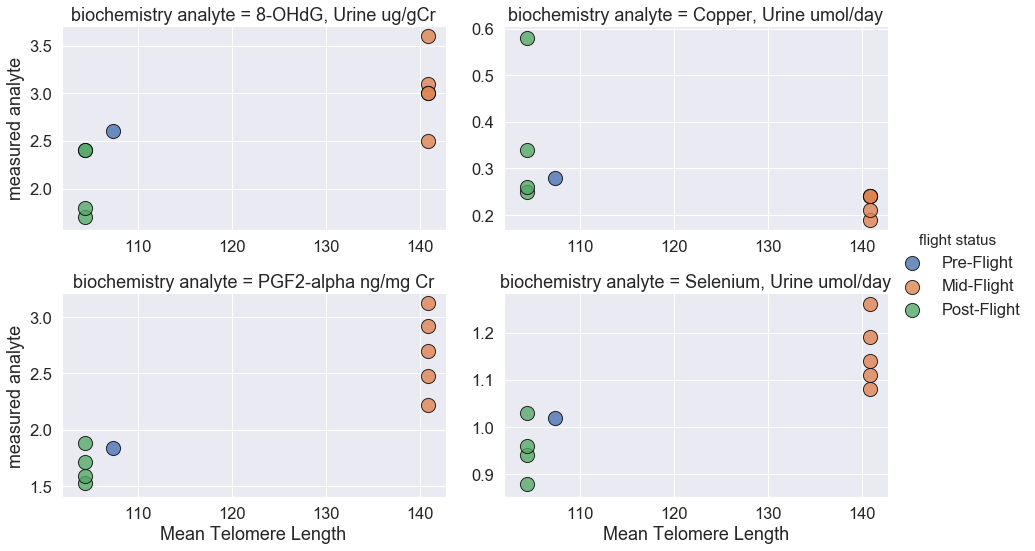

In [416]:
ax = sns.set(font_scale=1.5)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=2,
                data=merge_urine_telos,
                sharex=False,
                sharey=False,
                fit_reg=False, scatter_kws={'s':200, 'edgecolor':'black', 'linewidth':1},
                height=4, aspect=1.6,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
          )

ax.savefig('graph data/biochemistry correlations/scatterplot correlations urine analytes mean telomere length.png', dpi=400)

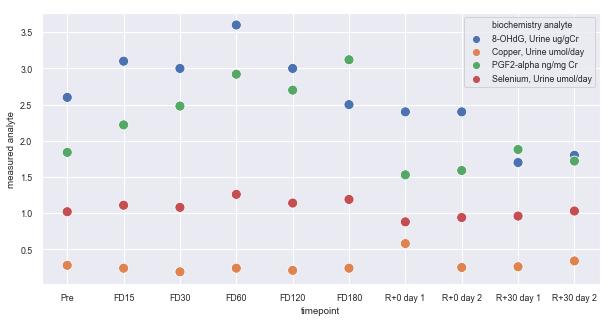

In [129]:
ax = sns.set(font_scale=.8)
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x='timepoint', y='measured analyte', hue='biochemistry analyte', 
                data=merge_urine_telos, s=100)


### Reading in blood analyte data (n=11) & merging with telo data

In [644]:
melt_blood_biochem_data = pd.read_csv('../excel data/melt_blood_biochem_data.csv')
melt_blood_biochem_data.head(2)

biochemistry analyte sample type timepoint measurement flight status  \
0     CCL2/MCP-1 pg/ml       blood       Pre     83 ± 17    Pre-Flight   
1    CCL3/MIP-1a pg/ml       blood       Pre   438 ± 194    Pre-Flight   

   measured analyte  
0              83.0  
1             438.0

In [645]:
def select_astros_of_interest(analyte_df, telomere_df, astro_ids_of_interest):
    if 'sample type' in analyte_df.columns:
        analyte_df.drop('sample type', axis=1, inplace=True)
    
    # dropping unnecessary cols from telo df
    trim_astro_df = astro_df.drop(['astro number', 'timepoint', 'telo data', 'Q1', 'Q2-3', 'Q4'], axis=1)
    
    if astro_ids_of_interest == 'all astros':
        if 'astro id' in analyte_df.columns:
            print("Error... you want to use astro ids but the column isn't present in analyte_df; exiting fxn..")
            return
        else: 
            # retain all astro ids
            selected_astros = trim_astro_df
            id_values = ['flight status']

    elif astro_ids_of_interest != 'all astros':
        # subset astro ids of interest 
        selected_astros = trim_astro_df[trim_astro_df['astro id'].isin(astro_ids_of_interest)].reset_index(drop=True)
        id_values = ['astro id', 'flight status']
        
    return analyte_df, selected_astros, id_values

In [646]:
def merge_analyte_telomere_data(analyte_df, selected_astros, id_values):
    
    # take mean telomere length values of all astronauts or per astros of interest & merge with analytes 
    mean_selected_astros = selected_astros.groupby(id_values).agg('mean').reset_index()
    merge_analyte_df = analyte_df.merge(mean_selected_astros, on=id_values)
    merge_analyte_df.rename(columns={'telo means':'Mean Telomere Length'}, inplace=True)
    
    # prepare to drop any columns w/ missing data
    indexer=['timepoint', 'Mean Telomere Length']
    for id_value in id_values:
        indexer.append(id_value)
        
    return merge_analyte_df, indexer

In [647]:
def how_drop_missing_values(merge_analyte_df, how_drop_missing, indexer):
    # drop every analyte (columns) with missing data
    if how_drop_missing == 'by column':
        pivot_merge = (merge_analyte_df.pivot_table(index=indexer, columns='biochemistry analyte', 
                                                    values='measured analyte').reset_index())
        pivot_merge.dropna(axis=1, inplace=True)
        cleaned_data = pivot_merge.melt(id_vars=indexer, var_name='biochemistry analyte', 
                                        value_name='measured analyte').reset_index(drop=True)
    
    # drop missing data on per analyte/timepoint/astro (row) basis 
    elif how_drop_missing == 'by melted row':
        cleaned_data = merge_analyte_df.dropna(axis=0)
        
    return cleaned_data

In [732]:
def retain_flight_status(cleaned_data, retain_what_flight_status):
    # retaining analytes for which flight status
    if retain_what_flight_status == 'any':
        retained_data = cleaned_data
        
    elif bool(set(retain_what_flight_status) & set(['Pre-Flight', 'Mid-Flight', 'Post-Flight'])) == True:
#         retain_what_flight_status ['Pre-Flight', 'Mid-Flight', 'Post-Flight']:
        retained_data = cleaned_data[cleaned_data['flight status'].isin(retain_what_flight_status)]
        
    elif retain_what_flight_status == 'require at least one per status':
        total_analytes = list(cleaned_data['biochemistry analyte'].unique())
        analytes_3_unique_flight = []
        groupby_analyte = cleaned_data.groupby('biochemistry analyte')
        
        for analyte in total_analytes:
            get_group_by_analyte = groupby_analyte.get_group(analyte)
            grouped_flight_status_list = list(get_group_by_analyte['flight status'].unique())

            if grouped_flight_status_list == ['Pre-Flight', 'Mid-Flight', 'Post-Flight']:
                analytes_3_unique_flight.append(analyte)
                
        analytes_only_3_unique_df = cleaned_data[cleaned_data['biochemistry analyte'].isin(analytes_3_unique_flight)]
        return analytes_only_3_unique_df
        
    return retained_data

In [733]:
def correlate_astro_analytes_telomeres_pipeline(analyte_df=None, telomere_df=None, astro_ids_of_interest=None,
                                                how_drop_missing=None, retain_what_flight_status=None):
    """
    High level fxn description 
    
    Args:
        analyte_df (pandas dataframe): Contains either n=4 or n=11 biochemical analyte data in tidy data format.
        
        telo_mere_df (pandas dataframe): Must contain complete telomere length data in tidy data format.
        
        astro_ids_of_interest (str or list of str): Accepts either 'all astros' as str, whereby all astronaut data is 
        used for correlating telo/analyte data, or a list of astro ids to subset data for analysis.
        
        how_drop_missing (str): Accepts either 'by column', which drops any analyte containing at least one missing value,
        or 'by melted row', which drops only single instances of missing values.
        
        retain_what_flight_status (str or list of tring): decides how to subset indiidual analytes based on what 
        flight status labels they have 
        
            Accepts: 'any', whereby no subselection is placed on analytes based on flight status, 
            or: subset data by flight status (list of str) as a GROUP i.e ['Pre-Flight'] or ['Pre-Flight', 'Mid-'Flight', 'Post-Flight']
            or: 'require at least one per status', where EACH analytes must have at least one measurement per flight status 

    Returns:
        retained_data (pandas dataframe): Data subject to the processing steps described above.
    """
    
    # selecting astros of interest & capturing id values for handling merges 
    analyte_df, selected_astros, id_values = select_astros_of_interest(analyte_df, telomere_df, astro_ids_of_interest)

    # merging analyte & telomere data, capturing indexer for handling missing data
    merge_analyte_df, indexer = merge_analyte_telomere_data(analyte_df, selected_astros, id_values)

    # dropping missing values based on input
    cleaned_data = how_drop_missing_values(merge_analyte_df, how_drop_missing, indexer)
    
    # subsetting values based on flight status labels 
    retained_data = retain_flight_status(cleaned_data, retain_what_flight_status)
    
    return retained_data

In [735]:
blood_n11_drop_rows_all_status = correlate_astro_analytes_telomeres_pipeline(analyte_df=melt_blood_biochem_data, telomere_df=astro_df, 
                                                  astro_ids_of_interest='all astros',
                                                  how_drop_missing='by melted row', 
#                                                   retain_what_flight_status=['Pre-Flight', 'Mid-Flight', 'Post-Flight'])
                                                  retain_what_flight_status='require at least one per status')
# print(blood_n11_drop_rows_all_status.shape)
blood_n11_drop_rows_all_status.shape

(222, 6)

In [705]:
high_corr_tests_pivot = []

grouped_by_analyte = p_drop_melt_merge_blood_telos.groupby('biochemistry analyte')

for group in list(p_drop_melt_merge_blood_telos['biochemistry analyte'].unique()):
    telomere_corr = grouped_by_analyte.get_group(group).corr()['Mean Telomere Length'][1]
#     print(grouped_by_analyte.get_group(group).corr())
    
         
    if abs(telomere_corr) > 0.75:
        high_corr_tests_pivot.append(telomere_corr)
        print(f"{group}: {telomere_corr:.4f}")

CCL3/MIP-1a pg/ml: 0.8965
CCL4/MIP1B pg/ml: 0.8412
CCL5/RANTES pg/ml: 0.9640
CXCL5/ENA-78 pg/ml: 0.9781
FGF Basic Immune Lab pg/ml: 0.9054
GM-CSF pg/ml: 0.8768
IL-1 beta Immune Lab pg/ml: 0.9114
IL-17 pg/ml: 0.9259
IL-1a pg/ml: 0.8225
IL-2 pg/ml: 0.8811
IL-4 pg/ml: 0.9327
VEGF-1 Immune Lab pg/ml: 0.8641
Zinc, Serum umol/L: 0.7849


### Analyzing Correlations between Blood Analytes & Mean Telomere Length (n=11)

### Graphing Blood (n=11) correlations with Telomere Length

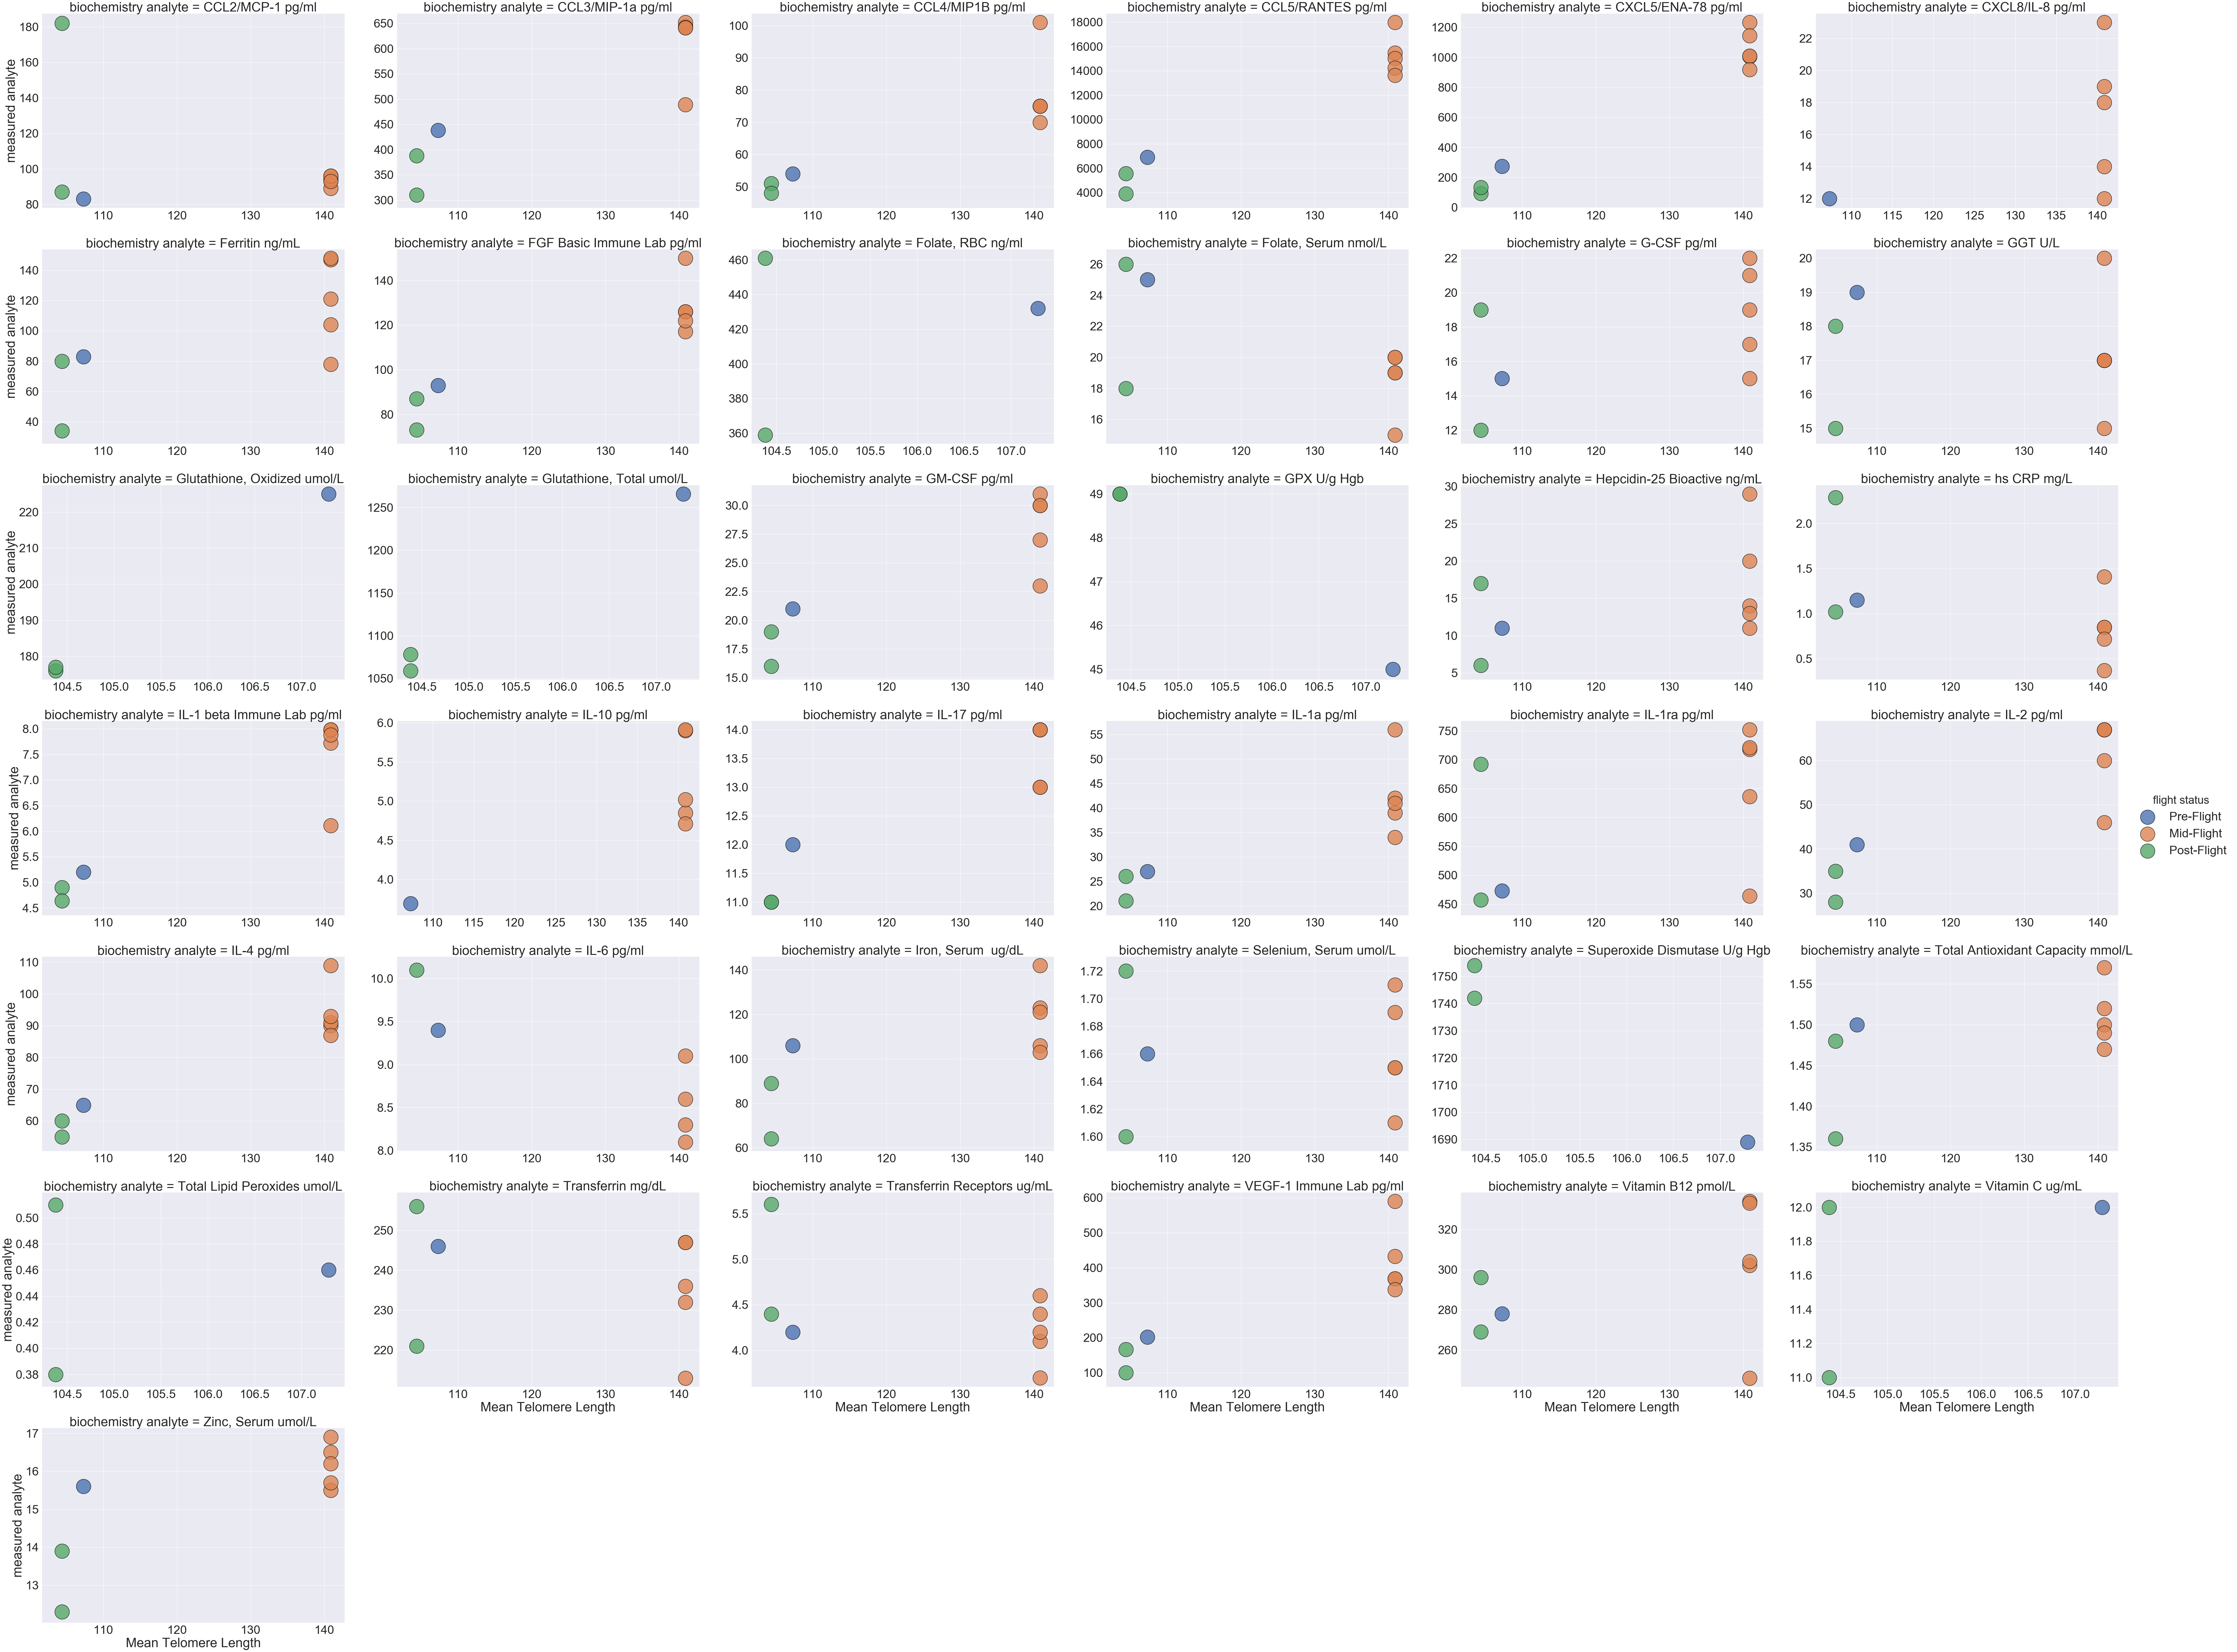

In [465]:
ax = sns.set(font_scale=3.6)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=6,
                data=drop_melt_merge_blood_telos,
                sharey=False,
                sharex=False,
                fit_reg=False,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
                scatter_kws={'s':2300, 'edgecolor':'black', 'linewidth':1.5},
                height=11, aspect=1.5,
          )
# plt.tight_layout()
# plt.show()
# ax.savefig('graph data/biochemistry correlations/scatterplot correlations blood analytes mean telomere length.png')

## Blood Biochemistry Data (n=4)

In [525]:
melt_blood_biochem_data_n4 = pd.read_csv('../excel data/melt_blood_biochem_data_n4.csv')
melt_blood_biochem_data_n4['astro id'] = melt_blood_biochem_data_n4['astro id'].astype('str')

melt_blood_biochem_data_n4.head(4)

astro id timepoint flight status biochemistry analyte  measured analyte
0     1261     L-180    Pre-Flight     CCL2/MCP-1 pg/ml             84.73
1     1261      L-45    Pre-Flight     CCL2/MCP-1 pg/ml             84.00
2     1261      L-10    Pre-Flight     CCL2/MCP-1 pg/ml             89.64
3     1261      FD15    Mid-Flight     CCL2/MCP-1 pg/ml             76.93

In [ ]:
### block regression instead of plots 

# interleukins
# chemokines
# inflammatory 

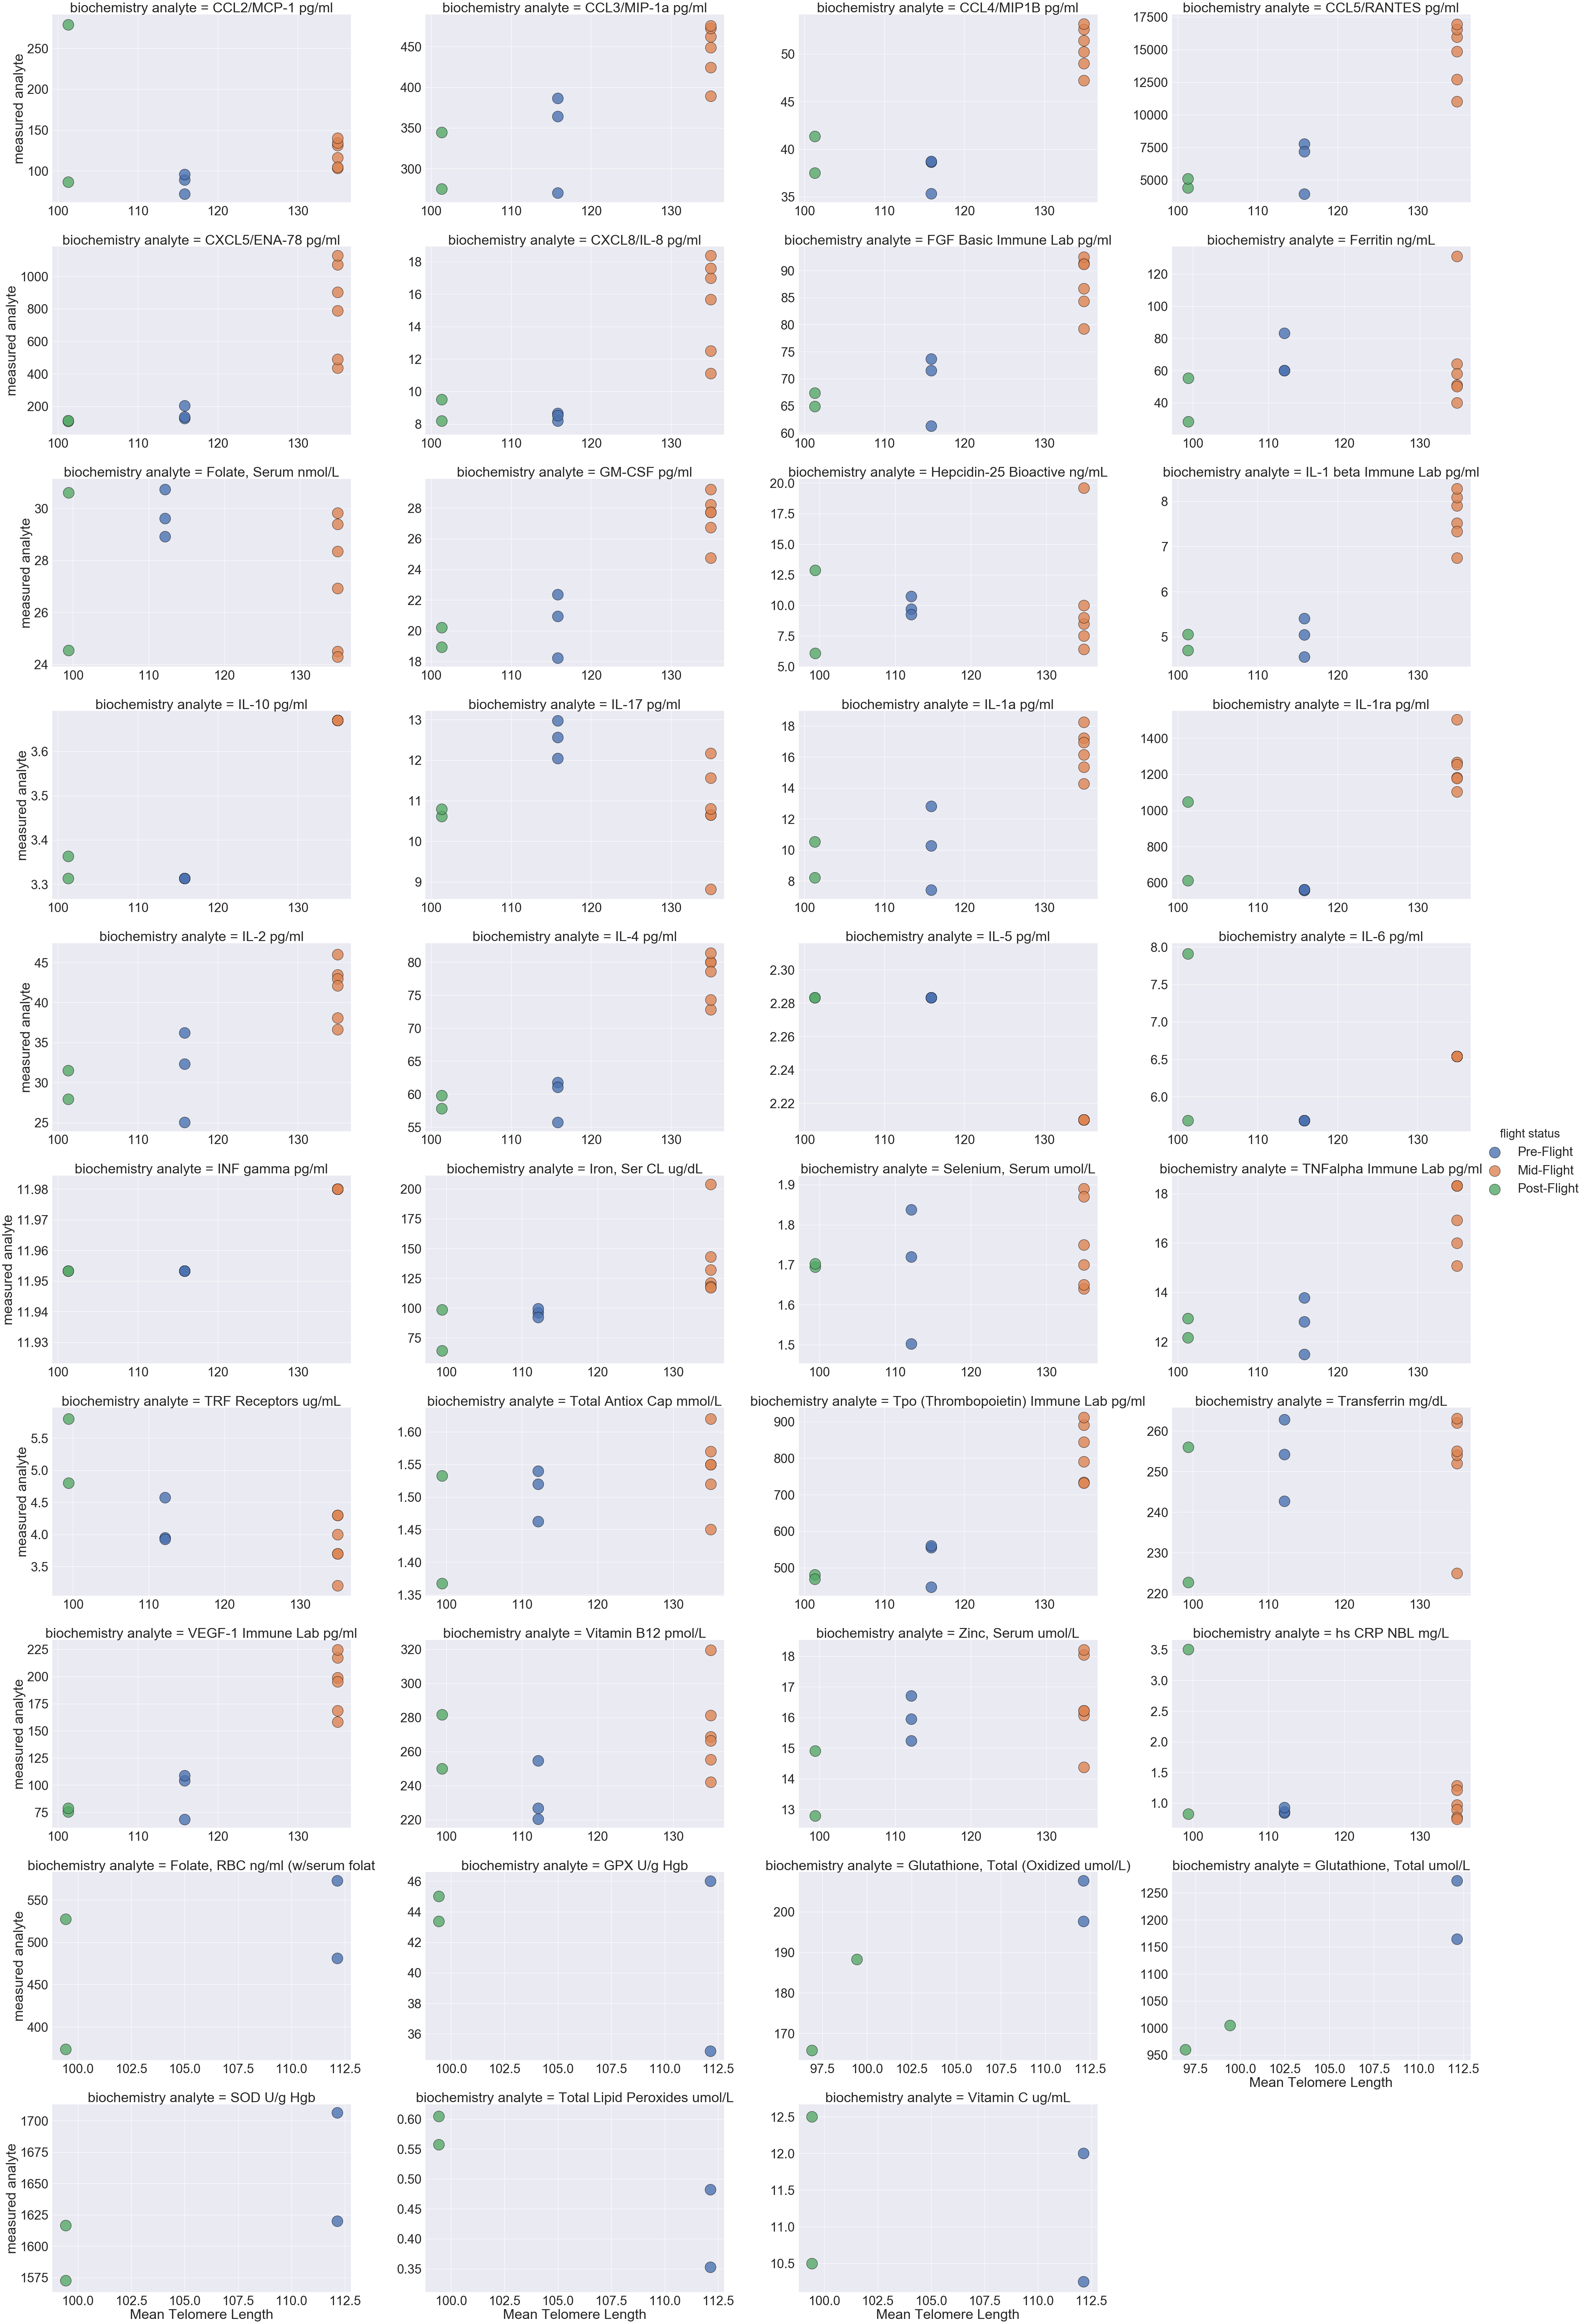

In [479]:
ax = sns.set(font_scale=3.2)
ax = sns.lmplot(x='Mean Telomere Length', y='measured analyte', hue='flight status', 
                col='biochemistry analyte', col_wrap=6,
                data=n_4_means_of_group,
                sharey=False,
                sharex=False,
                fit_reg=False,
                hue_order=['Pre-Flight', 'Mid-Flight', 'Post-Flight'],
                scatter_kws={'s':900, 'edgecolor':'black', 'linewidth':1},
                height=9, aspect=1.6,
          )
# plt.tight_layout()
# plt.show()
# ax.savefig('graph data/biochemistry correlations/n=4 scatterplot correlations blood analytes mean telomere length.png')

In [484]:
# need to for loop astro id, then for loop biochem analyte

# individ_corr = 
astro_ids = list(drop_merge_blood_biochem_data_n4['astro id'].unique())
astro_id_group = drop_merge_blood_biochem_data_n4.groupby('astro id')

for astro in astro_ids:
    individ_astro_df = astro_id_group.get_group(astro)
    analyte_group_individ = individ_astro_df.groupby('biochemistry analyte')
    analytes = list(individ_astro_df['biochemistry analyte'].unique())
    
    for analyte in analytes:
        telomere_corr = analyte_group_individ.get_group(analyte).corr()['Mean Telomere Length'][0]
        
        if abs(telomere_corr) > 0.5:
            print(f"{astro} - {analyte}: {telomere_corr:.4f}")


1261 - CCL2/MCP-1 pg/ml: -0.5846
1261 - Ferritin ng/mL: 0.7912
1261 - Folate, RBC ng/ml (w/serum folat: 0.8209
1261 - Folate, Serum nmol/L: 0.9792
1261 - Glutathione, Total umol/L: 0.6928
1261 - Hepcidin-25 Bioactive ng/mL: 0.6741
1261 - IL-17 pg/ml: 0.7710
1261 - IL-1ra pg/ml: -0.6669
1261 - SOD U/g Hgb: 0.8077
1261 - Total Lipid Peroxides umol/L: -0.9771
1261 - Transferrin mg/dL: 0.5269
1261 - TRF Receptors ug/mL: -0.9734
1261 - Vitamin B12 pmol/L: -0.5290
1261 - Vitamin C ug/mL: 0.7071
1261 - Zinc, Serum umol/L: 0.8545
2171 - CCL3/MIP-1a pg/ml: 0.5890
2171 - CCL5/RANTES pg/ml: 0.6481
2171 - CXCL5/ENA-78 pg/ml: 0.7652
2171 - CXCL8/IL-8 pg/ml: 0.7370
2171 - FGF Basic Immune Lab pg/ml: 0.6579
2171 - Folate, RBC ng/ml (w/serum folat: -0.5542
2171 - Folate, Serum nmol/L: 0.5925
2171 - Glutathione, Total (Oxidized umol/L): -0.5766
2171 - GM-CSF pg/ml: 0.6856
2171 - hs CRP NBL mg/L: -0.5965
2171 - IL-1 beta Immune Lab pg/ml: 0.6702
2171 - IL-10 pg/ml: -0.5523
2171 - IL-17 pg/ml: 0.5323
217

### Graphing Blood (n=4) correlations with Telomere Length